<a href="https://colab.research.google.com/github/HeshanNavindu-7/Brain-Tumor-MRI/blob/main/Brain_Tumor_2VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od
import os
import random
import matplotlib.pyplot as plt
import cv2

In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:01<00:00, 82.9MB/s]


In [4]:
#define path
dataset_dir="/content/brain-tumor-mri-dataset"
class_count={}
for mri_class in os.listdir(dataset_dir):
  print(mri_class)
  class_dir= os.path.join(dataset_dir,mri_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[mri_class]=num_images


Training
Testing


Train Data Samples:
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


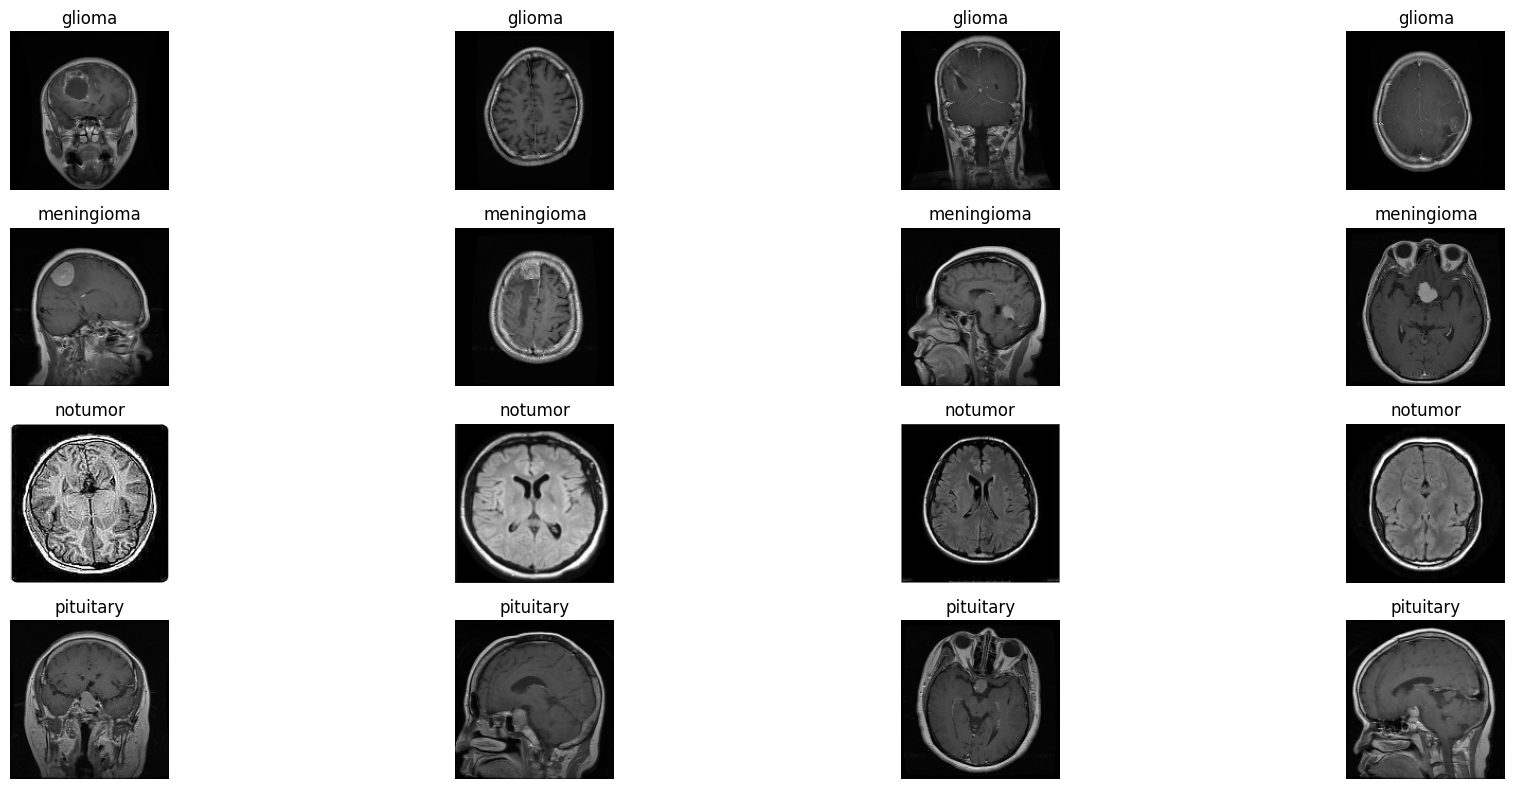

Test Data Samples:
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


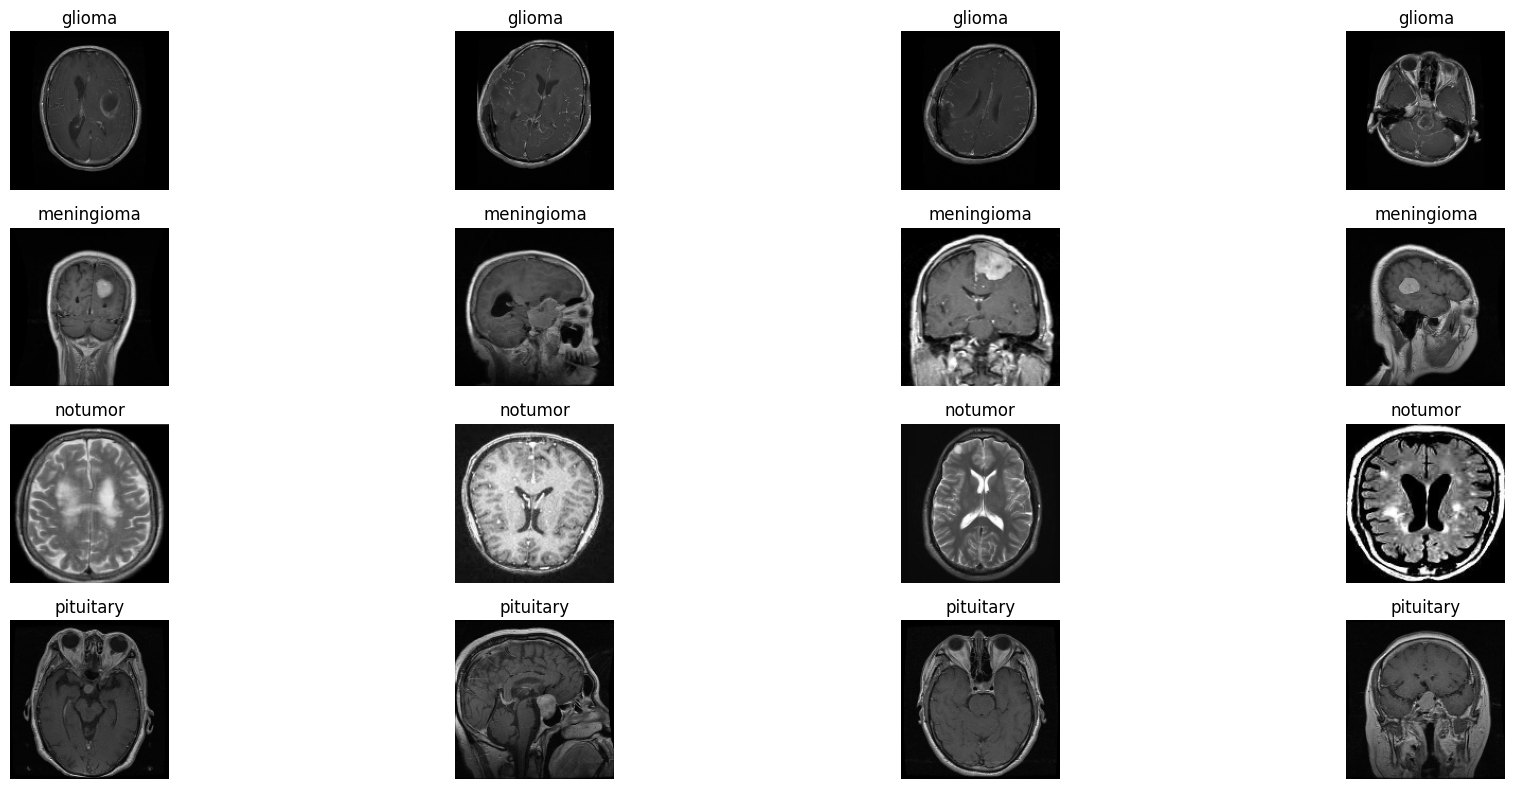

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define subdirectories for train and test data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

def display_sample(directory, num_samples=4):
    # Create a grid of subplots for displaying images
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(20, 8))

    # Loop over each class
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        # Loop over sample images in the current class directory
        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break

            # Read and preprocess the image
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image

            # Display the image on the corresponding subplot
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)

    # Adjust spacing between subplots and display the plot
    plt.tight_layout()
    plt.show()

# Display sample data from the train directory
print("Train Data Samples:")
display_sample(train_dir)

# Display sample data from the test directory
print("Test Data Samples:")
display_sample(test_dir)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators with augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into train/validation sets
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 80% of data for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use 20% of data for validation
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

print(base_model.summary())

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [8]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.0 MB/s eta 0:00:00


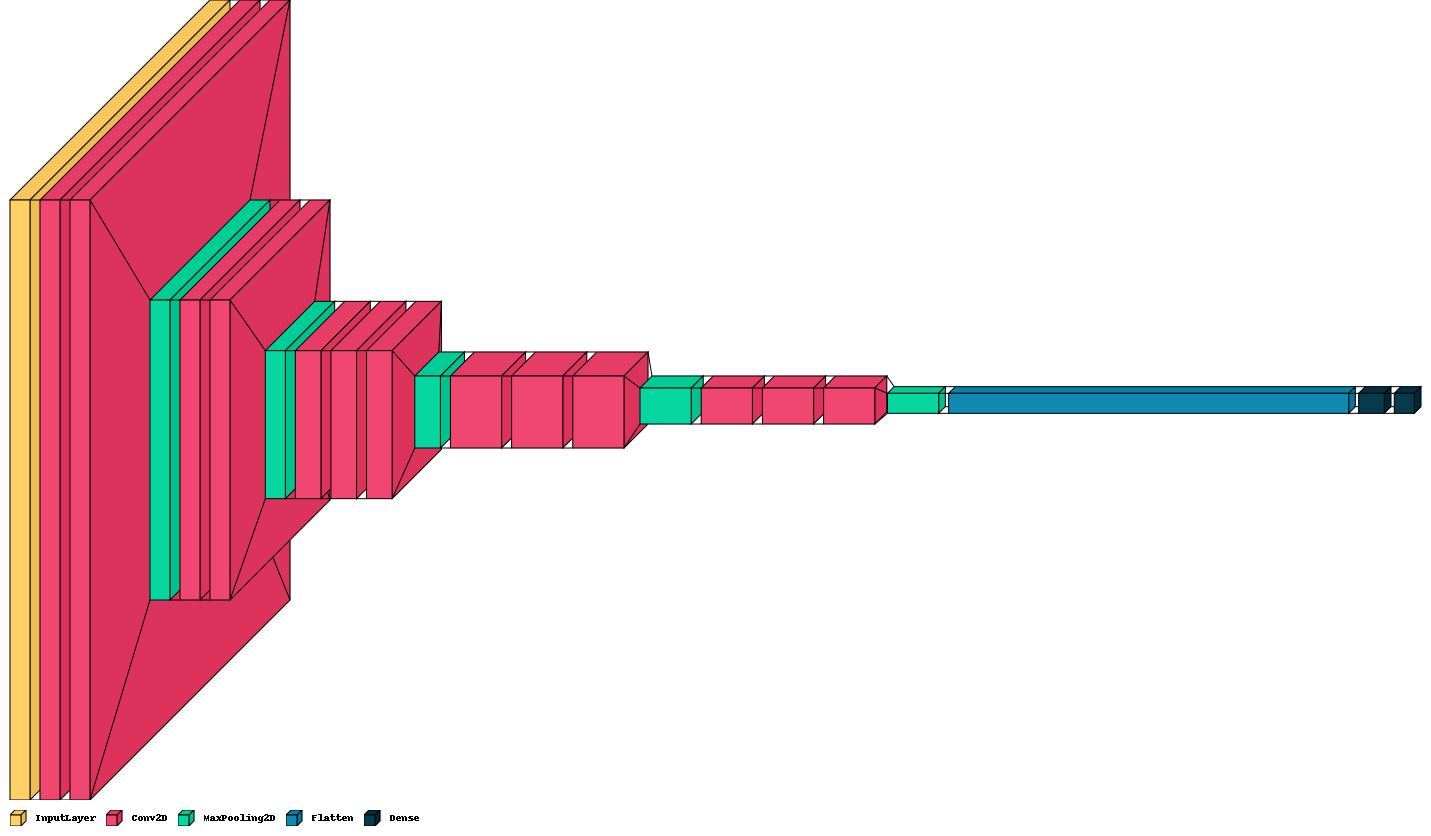

In [12]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [13]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)






Epoch 1/10
 46/142 [========>.....................] - ETA: 15:04 - loss: 0.3517 - accuracy: 0.8616

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:

print("Results")
result = model.evaluate_generator(test_generator, verbose=1)

print("%s%.2f" % ("Loss     : ", result[0]))
print("%s%.2f%s" % ("Accuracy : ", result[1] * 100, "%"))

In [ ]:
# Save the trained model
model.save('my_model.keras')
model.save('saved_model')

In [ ]:
import tensorflow as tf

# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Use the new converter for better compatibility

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
